# IPython 与 RQAlpha

In [2]:
#测试模块！！！
#from kivy.app import App


#import kivy 
#print ("kivy",kivy.__version__)
import matplotlib 
print ("matplotlib",matplotlib.__version__)

#import matplotlib.pyplot as plt
import numpy 
print ("numpy",numpy.__version__)

#np.seterr(all='ignore')
#rcParams['figure.figsize'] = (14, 6)
import funcat  #FUNCAT的同花顺/通达信指标模块：和：&，或：|，其他基本相同。可以使用指标选股！！！
print("funcat",funcat.__version__)

#import pytdx  #通达信数据更新模块到QUANTAXIS的mongoDB
#pttdx.__version__
import tushare  #TUSHARE数据连接更新。
print ("tushare",tushare.__version__)

import rqalpha #RQALPHA本地数据连接，通过 rqalpha update_bundle 8点后更新全部数据库
print("rqalpha",rqalpha.__version__)
#from jaqs import * #QunatOS的jaqs客户端在线。
#from abupy import * #ABUPY本地化，数据在线下载更新，数据在线下载在根目录abu下
#from quantaxis import * #加载QUANTAXIS数据库模块，首先需要开启mongoDB+web服务器，数据更新通过通达信服务器。
#from hikyuu import * #HIKYUU本地化，数据库在根目录的stock。通过通达信导入。
#import time
#time.__version__
#import datetime #读取/设定数据库时间区域，当前股票，选股时间段。 
#datetime.__version__
#print (list)

matplotlib 2.1.2
numpy 1.14.0
funcat 0.3.2
tushare 1.1.3
rqalpha 3.0.9


In [1]:
%load_ext rqalpha

## 加载 RQAlpha magic

## 查看 RQAlpha magic 帮助

我们可以通过 `%%rqalpha` 直接在 `cell` 中运行回测代码。 `%%rqalpha` 后面的参数等价于在 CLI 中后面的 `rqalpha run` 的参数

In [2]:
%%rqalpha -h
""

Usage: ipykernel_launcher.py [OPTIONS]

  Start to run a strategy

Options:
  -h, --help                      Show this message and exit.
  -d, --data-bundle-path PATH
  -f, --strategy-file PATH
  -s, --start-date DATE
  -e, --end-date DATE
  -bm, --benchmark TEXT
  -mm, --margin-multiplier FLOAT
  -a, --account TEXT...           set account type with starting cash
  --position TEXT                 set init position
  -fq, --frequency [1d|1m|tick]
  -rt, --run-type [b|p|r]
  --resume
  --source-code TEXT
  -l, --log-level [verbose|debug|info|error|none]
  --disable-user-system-log       disable user system log stdout
  --disable-user-log              disable user log stdout
  --logger TEXT...                config logger, e.g. --logger system_log
                                  debug
  --locale [cn|en]
  --extra-vars TEXT               override context vars
  --enable-profiler               add line profiler to profile your strategy
  --dividend-reinvestment         enable dividend r

## 使用 %%rqalpha 进行回测

2018-01-02 INFO positions hs300: 0, zz500: 0, gz: 0
2018-01-03 INFO positions hs300: 29, zz500: 0, gz: 0
2018-01-04 INFO positions hs300: 29, zz500: 0, gz: 0
2018-01-05 INFO positions hs300: 29, zz500: 0, gz: 0
2018-01-08 INFO positions hs300: 29, zz500: 0, gz: 0
2018-01-09 INFO positions hs300: 29, zz500: 0, gz: 0
2018-01-10 INFO positions hs300: 29, zz500: 0, gz: 0
2018-01-11 INFO positions hs300: 29, zz500: 0, gz: 0
2018-01-12 INFO positions hs300: 29, zz500: 0, gz: 0
2018-01-15 INFO positions hs300: 29, zz500: 0, gz: 0
2018-01-16 INFO positions hs300: 29, zz500: 0, gz: 0
2018-01-17 INFO positions hs300: 29, zz500: 0, gz: 0
2018-01-18 INFO positions hs300: 29, zz500: 0, gz: 0
2018-01-19 INFO positions hs300: 29, zz500: 0, gz: 0
2018-01-22 INFO positions hs300: 29, zz500: 0, gz: 0
2018-01-23 INFO positions hs300: 29, zz500: 0, gz: 0
2018-01-24 INFO positions hs300: 29, zz500: 0, gz: 0
2018-01-25 INFO positions hs300: 29, zz500: 0, gz: 0
2018-01-26 INFO positions hs300: 29, zz500: 0, 

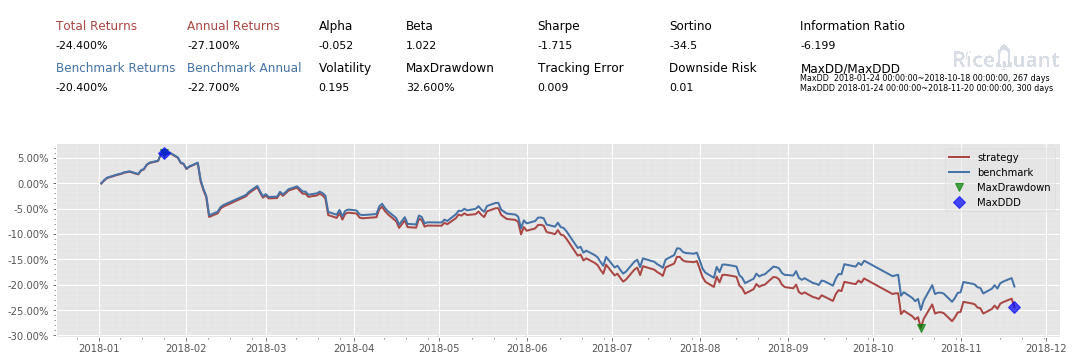

In [6]:
%%rqalpha -s 20180101 -e 20181120 -p -bm 000001.XSHG --account stock 100000


    
def init(context):
    context.stocks = ('000001.XSHG', '600001.XSHG', '000002.XSHG')
    #context.stocks = index_components('000300.XSHG')
    
def handle_bar(context, bar_dict):
    [hs, zz, gz] = context.stocks
    hs_history20 = history_bars(hs, 20, '1d', 'close')
    zz_history20 = history_bars(zz, 20, '1d', 'close')
    
    hsIncrease = hs_history20[-1] - hs_history20[0]
    zzIncrease = zz_history20[-1] - zz_history20[0]
    
    positions = context.portfolio.positions
    [hsQuality, zzQuality, gzQuality] = [positions[hs].quantity, positions[zz].quantity, positions[gz].quantity]
    if hsIncrease < 0 and zzIncrease < 0:
        if hsQuality > 0: order_target_percent(hs, 0)
        if zzQuality > 0: order_target_percent(zz, 0)
        order_target_percent(gz, 1)
    elif hsIncrease < zzIncrease:
        if hsQuality > 0: order_target_percent(hs, 0)
        if gzQuality > 0: order_target_percent(gz, 0)
        order_target_percent(zz, 1)
    else:
        if zzQuality > 0: order_target_percent(zz, 0)
        if gzQuality > 0: order_target_percent(gz, 0)
        order_target_percent(hs, 1)
        logger.info("positions hs300: " + str(hsQuality) + ", zz500: " + str(zzQuality) + ", gz: " + str(gzQuality))

2018-01-02 INFO positions hs300: 0, zz500: 0, gz: 0
2018-01-03 INFO positions hs300: 29, zz500: 0, gz: 0
2018-01-04 INFO positions hs300: 29, zz500: 0, gz: 0
2018-01-05 INFO positions hs300: 29, zz500: 0, gz: 0
2018-01-08 INFO positions hs300: 29, zz500: 0, gz: 0
2018-01-09 INFO positions hs300: 29, zz500: 0, gz: 0
2018-01-10 INFO positions hs300: 29, zz500: 0, gz: 0
2018-01-11 INFO positions hs300: 29, zz500: 0, gz: 0
2018-01-12 INFO positions hs300: 29, zz500: 0, gz: 0
2018-01-15 INFO positions hs300: 29, zz500: 0, gz: 0
2018-01-16 INFO positions hs300: 29, zz500: 0, gz: 0
2018-01-17 INFO positions hs300: 29, zz500: 0, gz: 0
2018-01-18 INFO positions hs300: 29, zz500: 0, gz: 0
2018-01-19 INFO positions hs300: 29, zz500: 0, gz: 0
2018-01-22 INFO positions hs300: 29, zz500: 0, gz: 0
2018-01-23 INFO positions hs300: 29, zz500: 0, gz: 0
2018-01-24 INFO positions hs300: 29, zz500: 0, gz: 0
2018-01-25 INFO positions hs300: 29, zz500: 0, gz: 0
2018-01-26 INFO positions hs300: 29, zz500: 0, 

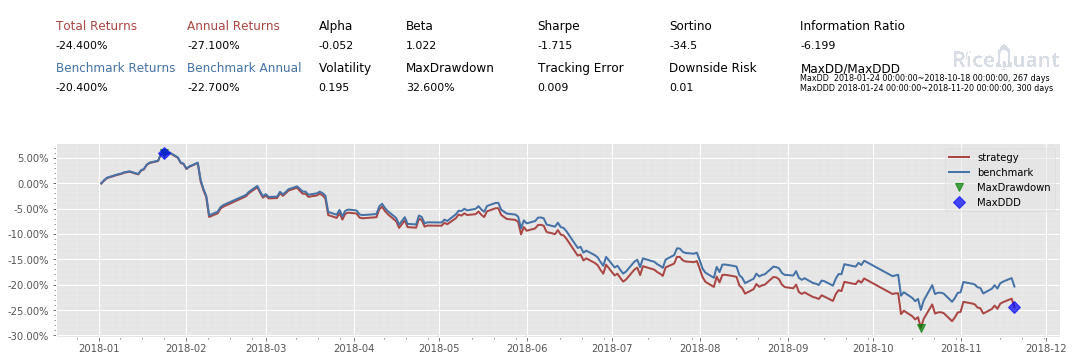

In [9]:
%%rqalpha -s 20180101 -e 20181120 -p -bm 000001.XSHG --account stock 100000


    
def init(context):
    context.stocks = ('000001.XSHG', '600001.XSHG', '000002.XSHG')
    #context.stocks = index_components('000300.XSHG')
    
def handle_bar(context, bar_dict):
    [hs, zz, gz] = context.stocks
    hs_history20 = history_bars(hs, 20, '1d', 'close')
    zz_history20 = history_bars(zz, 20, '1d', 'close')
    
    hsIncrease = hs_history20[-1] - hs_history20[0]
    zzIncrease = zz_history20[-1] - zz_history20[0]
    
    positions = context.portfolio.positions
    [hsQuality, zzQuality, gzQuality] = [positions[hs].quantity, positions[zz].quantity, positions[gz].quantity]
    if hsIncrease < 0 and zzIncrease < 0:
        if hsQuality > 0: order_target_percent(hs, 0)
        if zzQuality > 0: order_target_percent(zz, 0)
        order_target_percent(gz, 1)
    elif hsIncrease < zzIncrease:
        if hsQuality > 0: order_target_percent(hs, 0)
        if gzQuality > 0: order_target_percent(gz, 0)
        order_target_percent(zz, 1)
    else:
        if zzQuality > 0: order_target_percent(zz, 0)
        if gzQuality > 0: order_target_percent(gz, 0)
        order_target_percent(hs, 1)
        logger.info("positions hs300: " + str(hsQuality) + ", zz500: " + str(zzQuality) + ", gz: " + str(gzQuality))

## 获取回测报告

运行完回测后，报告会自动存储到 `report` 变量中。可以直接通过 `report` 变量获取当次回测的结果。

另外 rqalpha 的 mod 的输出会自动存储在 `results` 变量中。

In [15]:
results.keys()

dict_keys(['sys_analyser'])

In [16]:
report.keys()

dict_keys(['summary', 'trades', 'portfolio', 'benchmark_portfolio', 'stock_account', 'stock_positions'])

In [17]:
report.trades[:5]

,commission,exec_id,last_price,last_quantity,order_book_id,order_id,position_effect,side,symbol,tax,trading_datetime,transaction_cost
datetime,,,,,,,,,,,,
2017-01-03 15:00:00,78.802800,15417304300451,3283.45,30,000002.XSHG,15417304010461,OPEN,BUY,A股指数,0,2017-01-03 15:00:00,78.802800
2017-01-09 15:00:00,79.692720,15417304300452,3320.53,30,000002.XSHG,15417304010462,CLOSE,SELL,A股指数,0,2017-01-09 15:00:00,79.692720
2017-01-09 15:00:00,78.646752,15417304300453,3171.24,31,000001.XSHG,15417304010463,OPEN,BUY,上证指数,0,2017-01-09 15:00:00,78.646752
2017-01-11 15:00:00,77.791400,15417304300454,3136.75,31,000001.XSHG,15417304010464,CLOSE,SELL,上证指数,0,2017-01-11 15:00:00,77.791400
2017-01-11 15:00:00,78.824880,15417304300455,3284.37,30,000002.XSHG,15417304010465,OPEN,BUY,A股指数,0,2017-01-11 15:00:00,78.824880


In [18]:
report.portfolio[:5]

,cash,market_value,static_unit_net_value,total_value,unit_net_value,units
date,,,,,,
2017-01-03,1417.697,98503.50,1.000,99921.197,0.999212,100000.0
2017-01-04,1417.697,99223.50,0.999,100641.197,1.006412,100000.0
2017-01-05,1417.697,99431.70,1.006,100849.397,1.008494,100000.0
2017-01-06,1417.697,99083.70,1.008,100501.397,1.005014,100000.0
2017-01-09,2566.818,98308.44,1.005,100875.258,1.008753,100000.0


In [19]:
report.stock_positions[:5]

,avg_price,last_price,market_value,order_book_id,quantity,symbol
date,,,,,,
2017-01-03,3283.45,3283.45,98503.5,000002.XSHG,30.0,A股指数
2017-01-04,3283.45,3307.45,99223.5,000002.XSHG,30.0,A股指数
2017-01-05,3283.45,3314.39,99431.7,000002.XSHG,30.0,A股指数
2017-01-06,3283.45,3302.79,99083.7,000002.XSHG,30.0,A股指数
2017-01-09,3283.45,3320.53,0.0,000002.XSHG,0.0,A股指数


## 使用 run_func 运行回测

2018-10-08 WARN 000004.XSHE 在 2018-10-08 15:00:00 时停牌。
2018-10-09 WARN 000004.XSHE 在 2018-10-09 15:00:00 时停牌。
2018-10-10 WARN 000004.XSHE 在 2018-10-10 15:00:00 时停牌。
2018-10-11 WARN 000004.XSHE 在 2018-10-11 15:00:00 时停牌。
2018-10-12 WARN 000004.XSHE 在 2018-10-12 15:00:00 时停牌。
2018-10-15 WARN 000004.XSHE 在 2018-10-15 15:00:00 时停牌。
2018-10-16 WARN 000004.XSHE 在 2018-10-16 15:00:00 时停牌。
2018-10-17 WARN 000004.XSHE 在 2018-10-17 15:00:00 时停牌。
2018-10-18 WARN 000004.XSHE 在 2018-10-18 15:00:00 时停牌。
2018-10-19 WARN 000004.XSHE 在 2018-10-19 15:00:00 时停牌。
2018-10-22 WARN 000004.XSHE 在 2018-10-22 15:00:00 时停牌。
2018-10-23 WARN 000004.XSHE 在 2018-10-23 15:00:00 时停牌。
2018-10-24 WARN 000004.XSHE 在 2018-10-24 15:00:00 时停牌。
2018-10-25 WARN 000004.XSHE 在 2018-10-25 15:00:00 时停牌。
2018-10-26 WARN 000004.XSHE 在 2018-10-26 15:00:00 时停牌。
[2018-11-22 22:30:30.943977] WARN: system_log: Missing Chinese fonts. Fallback to English.


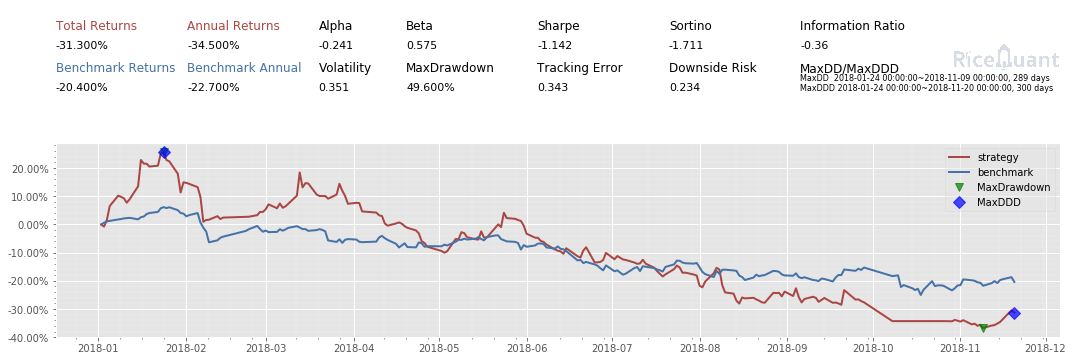

In [10]:
config = {
  "base": {
    "start_date": "2018-01-01",
    "end_date": "2018-11-20",
    "benchmark": "000001.XSHG",
    "accounts": {
        "stock": 100000
    }
  },
  "extra": {
    "log_level": "info",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True,
    },
  }
}


from rqalpha.api import *
from rqalpha import run_func


def init(context):
    context.stocks = ['600001.XSHG', '000002.XSHE', '000004.XSHE']
    #context.stocks = index_components('000300.XSHG')
    #scheduler.run_daily(sell,time_rule=market_close(minute = 20))
    #scheduler.run_daily(buy,time_rule = market_open(hour =1))
    
def handle_bar(context, bar_dict):
    [hs, zz, gz] = context.stocks
    hs_history20 = history_bars(hs, 20, '1d', 'close')
    zz_history20 = history_bars(zz, 20, '1d', 'close')
    
    hsIncrease = hs_history20[-1] - hs_history20[0]
    zzIncrease = zz_history20[-1] - zz_history20[0]
    
    positions = context.portfolio.positions
    [hsQuality, zzQuality, gzQuality] = [positions[hs].quantity, positions[zz].quantity, positions[gz].quantity]
    if hsIncrease < 0 and zzIncrease < 0:
        if hsQuality > 0: order_target_percent(hs, 0)
        if zzQuality > 0: order_target_percent(zz, 0)
        order_target_percent(gz, 1)
    elif hsIncrease < zzIncrease:
        if hsQuality > 0: order_target_percent(hs, 0)
        if gzQuality > 0: order_target_percent(gz, 0)
        order_target_percent(zz, 1)
    else:
        if zzQuality > 0: order_target_percent(zz, 0)
        if gzQuality > 0: order_target_percent(gz, 0)
        order_target_percent(hs, 1)
        
        
results = run_func(init=init, handle_bar=handle_bar, config=config)

In [21]:
report = results["sys_analyser"]

In [22]:
report["trades"][:5]

,commission,exec_id,last_price,last_quantity,order_book_id,order_id,position_effect,side,symbol,tax,trading_datetime,transaction_cost
datetime,,,,,,,,,,,,
2017-01-03 15:00:00,78.232,15417304300554,44.45,2200,000004.XSHE,15417304010566,OPEN,BUY,国农科技,0.00,2017-01-03 15:00:00,78.232
2017-01-18 15:00:00,65.384,15417304300555,37.15,2200,000004.XSHE,15417304010577,CLOSE,SELL,国农科技,81.73,2017-01-18 15:00:00,147.114
2017-01-19 15:00:00,65.920,15417304300556,20.60,4000,000002.XSHE,15417304010579,OPEN,BUY,万科A,0.00,2017-01-19 15:00:00,65.920
2017-01-25 15:00:00,65.952,15417304300557,20.61,4000,000002.XSHE,15417304010583,CLOSE,SELL,万科A,82.44,2017-01-25 15:00:00,148.392
2017-01-25 15:00:00,64.260,15417304300558,38.25,2100,000004.XSHE,15417304010584,OPEN,BUY,国农科技,0.00,2017-01-25 15:00:00,64.260


In [23]:
%load_ext rqalpha

The rqalpha extension is already loaded. To reload it, use:
  %reload_ext rqalpha


In [24]:
%%rqalpha -h
""

Usage: ipykernel_launcher.py [OPTIONS]

  Start to run a strategy

Options:
  -h, --help                      Show this message and exit.
  -d, --data-bundle-path PATH
  -f, --strategy-file PATH
  -s, --start-date DATE
  -e, --end-date DATE
  -bm, --benchmark TEXT
  -mm, --margin-multiplier FLOAT
  -a, --account TEXT...           set account type with starting cash
  --position TEXT                 set init position
  -fq, --frequency [1d|1m|tick]
  -rt, --run-type [b|p|r]
  -rp, --round-price
  -mk, --market [cn|hk]
  --resume
  --source-code TEXT
  -l, --log-level [verbose|debug|info|error|none]
  --disable-user-system-log       disable user system log stdout
  --disable-user-log              disable user log stdout
  --logger TEXT...                config logger, e.g. --logger system_log
                                  debug
  --locale [cn|en]
  --extra-vars TEXT               override context vars
  --enable-profiler               add line profiler to profile your strategy
  --co

In [25]:


%%rqalpha -s 20170101 -e 20180205 -p -bm 000001.XSHG --account stock 100000    

from scipy.stats import linregress

def init(context):
    scheduler.run_weekly(trade,tradingday=1,time_rule=market_open(minute=1))

def handle_bar(context, bar_dict):
    df = sorted([t for t in get_fundamentals(query(fundamentals.eod_derivative_indicator.market_cap).order_by(fundamentals.eod_derivative_indicator.market_cap.asc()).limit(500)).columns if 1-is_st_stock(t)],key=lambda t:history_bars(t,80,'1d','close').std())[:5]
    rg = linregress(range(10),history_bars('000300.XSHG',10,'1d','close'))
    for t in list(context.portfolio.positions)+df:order_target_percent(t,.99/5*(t in df)*(abs(rg[0]/rg[1])<.01))
        
        


In [13]:
%%rqalpha -s 20180101 -e 20181120 -p -bm 000001.XSHG --account stock 100000

'''
模块化各个要求，以方便调用

# 仓位管理
# 涨跌停限制
# 新股与次新股过滤
# 调仓时间定制化
# 风险管理——根据大盘择时
# 私有化定制常用绩效表现指标
# 黑名单管理，回测中不建议使用，但实盘时有必要加入
# 白名单设置，防止仓位不达标时，买入白名单股票
# 特定板块剔除（创业板，st）
'''

from rqalpha.api import *
from datetime import datetime
import numpy as np

'''
策略设计：基本面选股+股票择时+大盘风险控制
1。 根据PE要求买入市值最小的十只股票
2。 对每一只持仓股票进行技术判断，若低于10日线，则卖出
3。 根据大盘走势，对持仓进行调整，若中证500和沪深300的20天收益率全部低于0，则第二天清仓

'''


# 初始化参数设置
def init(context):
    logger.info("Initializing...")

    context.period = 10  # 自定义调仓频率
    context.days_count = 0  # 调仓间隔天数统计

    context.filter_blacklist = True
    context.filter_whitelist = False
    # context.filter_special_industry = True
    context.filter_gem = True
    context.filter_new_and_subnew = True

    context.selected_stocks_num = 100  # 股票池容量可以设置大一些，避免停牌股的影响
    context.to_buy_stocks_num = 10  # 实际持仓上线维持在10只股票

    context.select_by_pe = True
    context.max_pe = 200
    context.min_pe = 2

    # 输出各类参数
    logger.info("调仓日频率: %d 日" % (context.period))
    logger.info("备选股票数目: %d" % (context.selected_stocks_num))
    logger.info("购买股票数目: %d" % (context.to_buy_stocks_num))
    logger.info("是否根据PE选股: %s" % (context.select_by_pe))
    if context.select_by_pe:
        logger.info("最大PE: %s" % (context.max_pe))
        logger.info("最小PE: %s" % (context.min_pe))

    logger.info("是否过滤创业板股票: %s" % (context.filter_gem))
    logger.info("是否过滤黑名单股票: %s" % (context.filter_blacklist))
    logger.info("")
    if context.filter_blacklist:
        logger.info("当前股票黑名单：%s" % str(filter_black_list()))

    # 加载统计模块
    context.trade_stat = trade_stat()

    context.stocks = []


# 以什么标准进行选股，投资者可以自行定义
def before_trading(context):
    if context.select_by_pe:
        df = get_fundamentals(query(fundamentals.eod_derivative_indicator.pe_ratio).filter
                              (fundamentals.eod_derivative_indicator.pe_ratio > context.min_pe).filter
                              (fundamentals.eod_derivative_indicator.pe_ratio < context.max_pe).order_by
                              (fundamentals.eod_derivative_indicator.a_share_market_val_2.asc()).limit
                              (context.selected_stocks_num))
        context.stocks_pool = df.columns.values

    else:
        df = get_fundamentals(query(fundamentals.eod_derivative_indicator.a_share_market_val_2.asc()).
                              limit(context.selected_stocks_num))
        context.stocks_pool = df.columns.values


def handle_bar(context, bar_dict):
    logger.info("调仓时间统计：[%d]" % (context.days_count))

    # 计算指数过去20天的涨幅
    hs300 = '000300.XSHG'  # 沪深300指数
    zz500 = '000905.XSHG'  # 中证500指数
    hs300_return = calculate_return_rate(hs300)
    zz500_return = calculate_return_rate(zz500)
    logger.info("当前沪深300指数的20日涨幅 [%.2f%%]" % (hs300_return * 100))
    logger.info("当前中证500指数的20日涨幅 [%.2f%%]" % (zz500_return * 100))

    # 如果沪深300和中证500月度收益率皆为负，说明整个市场环境较差，清仓
    if hs300_return <= 0 and zz500_return <= 0:
        if context.filter_whitelist:
            logger.info("为了避免空仓，买入白名单股票")
            adjust_position(context, filter_white_list())
            context.days_count += 1

        else:
            if context.portfolio.positions:
                clear_position(context)
            context.days_count = 0  # 由于清空了持仓，所以此时的调仓计数需要重新设置为0

    else:
        if context.days_count % context.period == 0:
            logger.info("==> 满足条件进行调仓")
            to_buy_stocks = selected_stocks(context, bar_dict)
            logger.info("层层筛选后可买股票: %s" % (to_buy_stocks))
            adjust_position(context, to_buy_stocks)
        context.days_count += 1


        # plot("weights", context.portfolio.market_value / context.portfolio.portfolio_value)


def selected_stocks(context, bar_dict):
    stocks_list = context.stocks_pool  # 根据基本面数据构建的股票池
    stocks_list = [s for s in stocks_list if bar_dict[s].is_trading and not is_st_stock(s)]  # 排除ST股票，排除停牌股票
    stocks_list = [s for s in stocks_list if filter_limit_up_down(s, bar_dict)]  # 排除涨跌停股票

    # 排除新股和次新股
    if context.filter_new_and_subnew:
        stocks_list = [s for s in stocks_list if s in filter_new_and_subnew_stocks(context, stocks_list)]

    # 排除创业板股票
    if context.filter_gem:
        stocks_list = [s for s in stocks_list if s in filter_gem_stocks(stocks_list)]

    # 排除黑名单股票
    if context.filter_blacklist:
        stocks_list = [s for s in stocks_list if s not in filter_black_list()]

    '''
    # 排除钢铁行业股票，但目前申万行业分类还未加入回测平台
    if context.filter_special_industry:
        stocks_list = [s for s in stocks_list if s not in filter_special_industry(stocks_list, industry_name="钢铁")]
    '''

    for stock in stocks_list:
        r = calculate_return_rate(stock, n=10)  # 计算两周收益率
        if r > 0:
            context.stocks.append(stock)

    context.stocks = context.stocks[: context.to_buy_stocks_num]
    return context.stocks


# 计算过去20天某只股票和特定指数的涨跌情况
def calculate_return_rate(stock, n=20):
    p = history_bars(stock, n, "1d", "close")  # It's a list
    r = np.log(p[-1]) - np.log(p[0])
    return r


# 调仓设置，之前我们总是等比例分配仓位，且不断调仓，但是该种方法容易卖出表现好的股票，而多买入表现较差的股票
def adjust_position(context, stocks_pool):
    for stock in context.portfolio.positions:
        if stock not in stocks_pool:
            position = context.portfolio.positions[stock]  # 在每一次卖出时，根据盈亏计算胜率
            context.trade_stat.watch(stock, position)  # context.portfolio.positions[stock].quantity

            logger.info("不再满足持仓要求，将所持股票【{0}】仓位清空".format(stock))
            order_target_percent(stock, 0)

        # else:
        #     logger.info("股票【{0}】已经在持仓中".format(stock))

    holding_number = len(context.portfolio.positions)
    if context.to_buy_stocks_num > holding_number:
        value = context.portfolio.cash / (context.to_buy_stocks_num - holding_number)  # 将剩余的现金等额分配
        for stock in stocks_pool:
            if context.portfolio.positions[stock].quantity == 0:
                order_target_value(stock, value)
                if len(context.portfolio.positions) == context.to_buy_stocks_num:  # 达到持仓限额时，停止买入
                    break


# 设置一键清仓命令
def clear_position(context):
    logger.info("市场不好，清空股票@_@")
    for stock in context.portfolio.positions:
        position = context.portfolio.positions[stock]
        order_target_value(stock, 0)
        context.trade_stat.watch(stock, position)     # 在每次卖出时，统计被卖出的股票的盈亏情况


# 涨跌停限制
def filter_limit_up_down(stock, bar_dict):
    return bar_dict[stock].limit_down < bar_dict[stock].last < bar_dict[stock].limit_up


# 新股与次新股过滤，默认以60天为选取标准
def filter_new_and_subnew_stocks(context, stocks_pool, days=60):
    stocks_list = []
    for stock in stocks_pool:
        # temp = datetime.strptime(instruments(stock).listed_date, "%Y-%m-%d")
        temp = instruments(stock).listed_date
        diff = (context.now - temp).days
        if diff > days:
            stocks_list.append(stock)
    return stocks_list


# 建立黑名单，比如年报、季报净利润大幅预减的公司或者即将被ST或已经被ST的公司
def filter_black_list():
    blacklists = ["000037.XSHE", "000613.XSHG"]
    return blacklists


# 建立白名单制度，主要是为了满足参赛时，当大盘面临系统性风险时，仓位保持在最低仓位上，以蓝筹股为主
def filter_white_list():
    whitelists = ["600519.XSHG", "601398.XSHG", "601318.XSHG", "000538.XSHE", "000002.XSHE"]
    return whitelists


'''
# 不同于黑名单的特定股票排除，此处决定是否删除特定行业的股票，比如夕阳行业股，煤炭，钢铁等
# 默认不予排除
def filter_special_industry(stocks_pool, industry_name=None):
    if industry_name is None:
        return stocks_pool
    else:
        return [s for s in stocks_pool if s not in shenwan_industry(industry_name)]
'''


# 默认不删除创业板股票
def filter_gem_stocks(stocks_pool):
    return [s for s in stocks_pool if not s.startswith("300")]


# 收盘后计算相关结果
def after_trading(context):
    context.trade_stat.report(context)


# 私有化定制常用绩效指标
class trade_stat():
    def __init__(self):
        self.trade_total_count = 0  # 总的交易次数统计
        self.trade_success_count = 0  # 交易次数中成功的次数统计
        self.trade_continuous_growth = 0  # 收益连续为正天数统计
        self.trade_continuous_descent = 0  # 收益连续为负天数统计
        self.statis = {'win': [], 'loss': []}  # 最大盈利与最大亏损对应的股票及其幅度
        self.continuous = {"growth": 0, "descent": 0}  # 连续盈利和亏损对应的天数

    def reset(self):
        self.trade_total_count = 0
        self.trade_success_count = 0
        self.trade_continuous_growth = 0
        self.trade_continuous_descent = 0
        self.statis = {'win': [], 'loss': []}
        self.continuous = {"growth": 0, "descent": 0}

    # 记录交易次数便于统计胜率
    # 暂且只针对单只股票卖出仓位统计
    def watch(self, stock, sale_position):
        self.trade_total_count += 1
        amount = sale_position.quantity
        avg_cost = sale_position.avg_price  # to be abandoned...

        current_value = sale_position.market_value
        cost = amount * avg_cost

        percent = round((current_value - cost) / cost * 100, 2)
        if current_value > cost:
            self.trade_success_count += 1
            win = [stock, percent]
            self.statis['win'].append(win)
        else:
            loss = [stock, percent]
            self.statis['loss'].append(loss)

    # 根据当日盈亏来判断
    def stat_continuous(self, context):
        if context.portfolio.daily_pnl > 0:
            self.trade_continuous_growth += 1
            self.trade_continuous_descent = 0

        elif context.portfolio.daily_pnl < 0:
            self.trade_continuous_descent += 1
            self.trade_continuous_growth = 0

        if self.trade_continuous_growth > self.continuous["growth"]:
            self.continuous["growth"] = self.trade_continuous_growth

        if self.trade_continuous_descent > self.continuous["descent"]:
            self.continuous["descent"] = self.trade_continuous_descent

        return self.continuous["growth"], self.continuous["descent"]


    # 统计单次盈利最高的股票
    def statis_most_win_percent(self):
        result = {}
        for statis in self.statis['win']:
            if {} == result:
                result['stock'] = statis[0]
                result['value'] = statis[1]
            else:
                if statis[1] > result['value']:
                    result['stock'] = statis[0]
                    result['value'] = statis[1]
        return result

    # 统计单次亏损最高的股票
    def statis_most_loss_percent(self):
        result = {}
        for statis in self.statis['loss']:
            if {} == result:
                result['stock'] = statis[0]
                result['value'] = statis[1]
            else:
                if statis[1] < result['value']:
                    result['stock'] = statis[0]
                    result['value'] = statis[1]
        return result

    # 统计总盈利金额
    def statis_total_profit(self, context):
        return context.portfolio.portfolio_value - context.portfolio.starting_cash

    # 打印胜率
    def print_win_rate(self, current_date, print_date, context):
        if str(current_date) == str(print_date):
            win_rate = 0  # 胜率每天更新，所以需要每天进行赋值归0
            if 0 < self.trade_total_count and 0 < self.trade_success_count:
                win_rate = round(self.trade_success_count / float(self.trade_total_count), 3)

            most_win = self.statis_most_win_percent()
            most_loss = self.statis_most_loss_percent()
            continuous_growth_days, continuous_descent_days = self.stat_continuous(context)

            starting_cash = context.portfolio.starting_cash
            total_profit = self.statis_total_profit(context)
            if len(most_win) == 0 or len(most_loss) == 0:
                return

            print("-")
            print('------------绩效报表------------')
            print('交易次数: {0}, 盈利次数: {1}, 胜率: {2}'.format(self.trade_total_count, self.trade_success_count,
                                                         str(win_rate * 100) + str('%')))
            print('单次盈利最高: {0}, 盈利比例: {1}%'.format(most_win['stock'], most_win['value']))
            print('单次亏损最高: {0}, 亏损比例: {1}%'.format(most_loss['stock'], most_loss['value']))
            print("最大连续盈利天数: {0}".format(continuous_growth_days))
            print("最大连续亏损天数: {0}".format(continuous_descent_days))
            print('总资产: {0}, 本金: {1}, 盈利: {2}, 盈亏比率：{3}%'.format(starting_cash + total_profit, starting_cash,
                                                                 total_profit, total_profit / starting_cash * 100))
            print('--------------------------------')
            print("-")

    def report(self, context):
        cash = context.portfolio.cash
        total_value = context.portfolio.portfolio_value
        position = 1 - cash / total_value
        logger.info("收盘后持仓概况: %s" % str(list(context.portfolio.positions)))
        logger.info("仓位概况: %.2f" % position)
        logger.info("当日盈亏: %.2f" % context.portfolio.daily_pnl)
        self.print_win_rate(context.now.strftime("%Y-%m-%d"), context.now.strftime("%Y-%m-%d"), context)



2018-01-02 INFO Initializing...
2018-01-02 INFO 调仓日频率: 10 日
2018-01-02 INFO 备选股票数目: 100
2018-01-02 INFO 购买股票数目: 10
2018-01-02 INFO 是否根据PE选股: True
2018-01-02 INFO 最大PE: 200
2018-01-02 INFO 最小PE: 2
2018-01-02 INFO 是否过滤创业板股票: True
2018-01-02 INFO 是否过滤黑名单股票: True
2018-01-02 INFO 
2018-01-02 INFO 当前股票黑名单：['000037.XSHE', '000613.XSHG']


AttributeError: module 'better_exceptions' has no attribute 'format_traceback'